<a href="https://colab.research.google.com/github/EliseuODaniel/Analise_temperatura_motor_eletrico/blob/main/analise_2_regressao_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear Múltipla

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/notebooks/input/measures_v2.csv')
df.shape


(1330816, 13)

In [4]:
# remoção da coluna torque, pois não servirá como variável nem de entrada e nem de saída
df.drop('torque', axis=1, inplace=True)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#testagens separadas pra teste
test_set_profiles = range(65,73)
x_cols = ['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed']

#separado 2 datasets, um com as testagens que serão usadas pra treino e outro as de teste
trainset = df.loc[~df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)
testset = df.loc[df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)


X_train = trainset.loc[:, x_cols]
y_train = trainset.loc[:, 'pm']
X_test = testset.loc[:, x_cols]
y_test = testset.loc[:, 'pm']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Modelagem

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
test_predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [13]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [14]:
MAE

9.626260043968127

In [15]:
MSE

145.61949126832434

In [16]:
RMSE

12.067290137736986

In [17]:
#valor médio das temperaturas do rotor em todo o dataset - para comparar com o RMSE
#ou seja, as previsões do modelo variam 12 para + e - de 58,51
df['pm'].mean()

58.50677585061459

In [18]:
model.coef_

array([ 3.45710883,  0.27371003, -0.02454806, -0.15762809, -0.01102822,
       -0.06439077,  0.00599777])

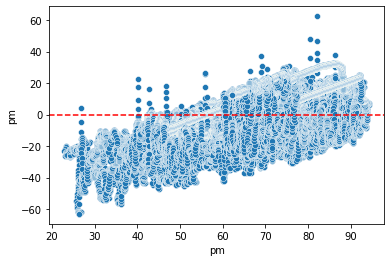

In [19]:
# plotagem da distribuição dos resíduos
test_res = y_test - test_predictions

sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

nota-se que os resíduos tem uma distribuição com tendencia
o que significa que o modelo não é o mais adequado

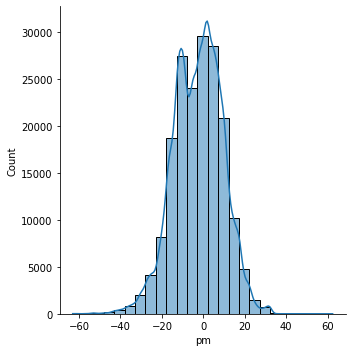

In [20]:
#plotagem da distribuição dos resíduos pra verificar visualmente a normalidade
sns.displot(test_res,bins=25,kde=True)

In [21]:
import scipy as sp

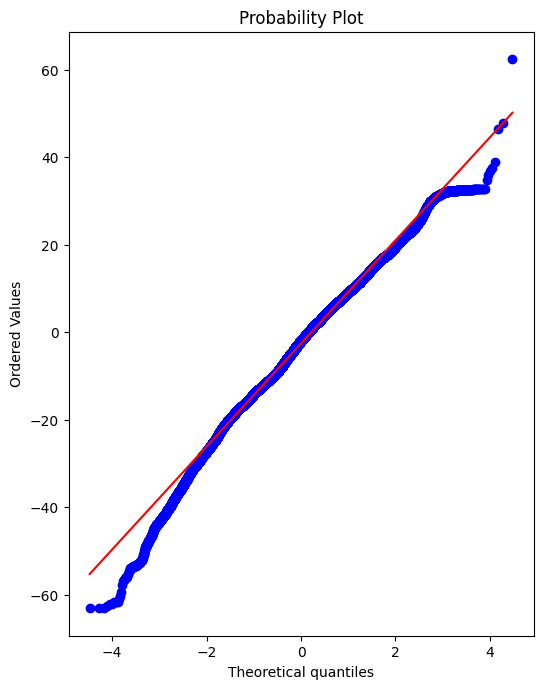

In [22]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

como os resíduos se afastam da linha vermelha (correspondente à normal) no início e no fim, percebe-se visualmente que não seguem uma distribuição normal

In [23]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 2.767e+05
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        07:22:12   Log-Likelihood:            -4.4835e+06
No. Observations:             1148796   AIC:                         8.967e+06
Df Residuals:                 1148788   BIC:                         8.967e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -42.0963      0.161   -261.705      0.000     -42.412     -41.781
ambient         3.4571      0.007    492.108      0.000       3.443       3.471
coolant         0.2737      0.001    437.629      0.000       0.272       0.275
i_q            -0.0245      0.000   -106.579      0.000      -0.025      -0.024
u_q            -0.1576      0.001   -271.774      0.000      -0.159      -0.156
i_d            -0.0110      0.000    -26.538      0.000      -0.012      -0.010
u_d            -0.0644      0.000   -196.073      0.000      -0.065      -0.064
motor_speed     0.0060   2.09e-05    286.388      0.000       0.006       0.006
==============================================================================
Omnibus:                    48142.826   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86630.225
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       4.161   Cond. No.                     4.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Model

Aplicação do modelo de regressão linear em todos os dados do dataset, sem separar entre teste e treino.

In [24]:
X = df[x_cols]
y = df['pm']

final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

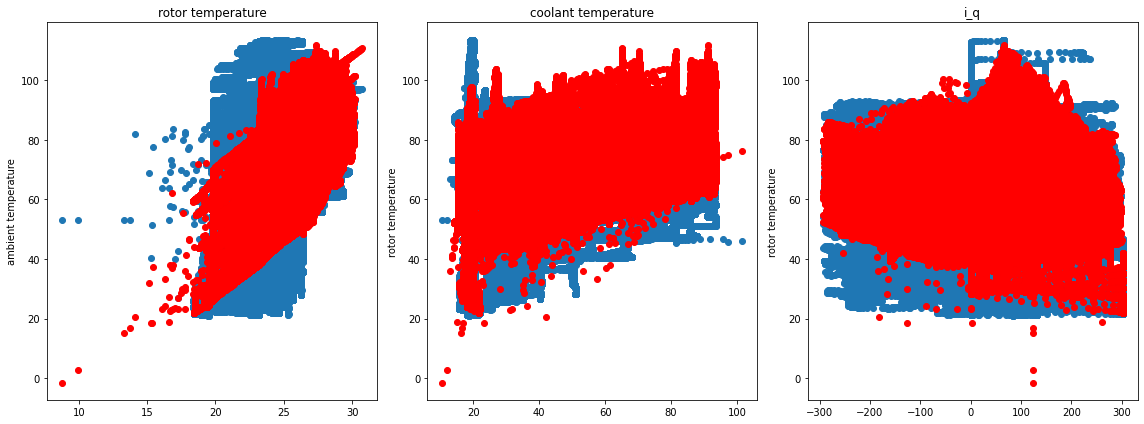

In [25]:
#visualização de como as predições do modelo (em vermelho) se comparam 
#com a distribuição dos dados reais do dataset


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['ambient'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['ambient'],y_hat,'o',color='red')
axes[0].set_ylabel("ambient temperature")
axes[0].set_title("rotor temperature")

axes[1].plot(df['coolant'],df['pm'],'o')
axes[1].plot(df['coolant'],y_hat,'o',color='red')
axes[1].set_title("coolant temperature")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['i_q'],df['pm'],'o')
axes[2].plot(df['i_q'],y_hat,'o',color='red')
axes[2].set_title("i_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

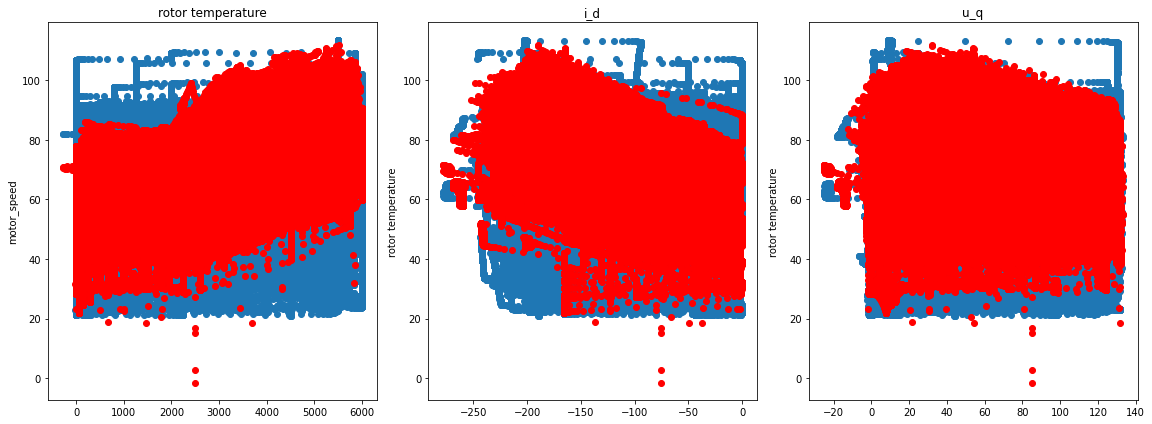

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['motor_speed'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['motor_speed'],y_hat,'o',color='red')
axes[0].set_ylabel("motor_speed")
axes[0].set_title("rotor temperature")

axes[1].plot(df['i_d'],df['pm'],'o')
axes[1].plot(df['i_d'],y_hat,'o',color='red')
axes[1].set_title("i_d")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['u_q'],df['pm'],'o')
axes[2].plot(df['u_q'],y_hat,'o',color='red')
axes[2].set_title("u_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

In [27]:
residuals = y_hat - y

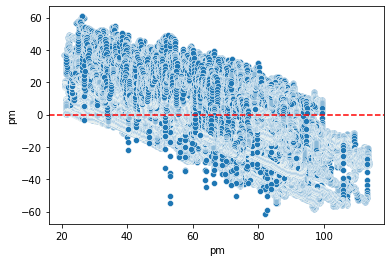

In [28]:
#plotagem de todos os resíduos

sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [29]:
#coeficientes no modelo final
final_model.coef_

array([ 3.35978567,  0.27191838, -0.02561786, -0.14545868, -0.01134362,
       -0.06481298,  0.0056019 ])

In [30]:
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.881e+05
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        07:23:14   Log-Likelihood:            -5.1932e+06
No. Observations:             1330816   AIC:                         1.039e+07
Df Residuals:                 1330808   BIC:                         1.039e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.7694      0.152   -261.383      0.000     -40.068     -39.471
ambient         3.3598      0.007    512.969      0.000       3.347       3.373
coolant         0.2719      0.001    481.000      0.000       0.271       0.273
i_q            -0.0256      0.000   -120.999      0.000      -0.026      -0.025
u_q            -0.1455      0.001   -272.776      0.000      -0.147      -0.144
i_d            -0.0113      0.000    -29.869      0.000      -0.012      -0.011
u_d            -0.0648      0.000   -216.951      0.000      -0.065      -0.064
motor_speed     0.0056   1.93e-05    290.554      0.000       0.006       0.006
==============================================================================
Omnibus:                    44153.779   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73587.200
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       3.984   Cond. No.                     4.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura  do rotor, pois os valores de p são muito baixos.




# Análise dos resultados da regressão múltipla

O R² mostra que o modelo calculado explica em 60,2% dos valores mensurados.
A variável mais influente é temperatura ambiente (x1) que, no momento da aferição, tem coeficiente linear de 3,3598. A segunda variável mais influente dada pelo modelo é a de temperatura do líquido de arrefecimento (x2), com coeficiente linear de 0,2719.

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura do rotor do estator, pois os valores de p são muito baixos.

A pontuação do teste Durbin-Watson também está muito próxima de 0, portanto, podemos dizer que há uma autocorrelação positiva no conjunto de dados.

O valor Prob(JP) para o teste de Jarque-Bera é menor que 0,05, então rejeitamos a hipótese nula de que os resíduos (variação natural dos dados que o modelo não capturou) são normalmente distribuídos, conforme será mostrado visuamente abaixo. 


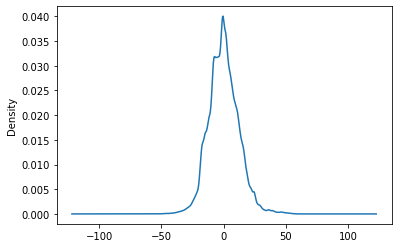

In [31]:
results.resid.plot(kind = 'density')

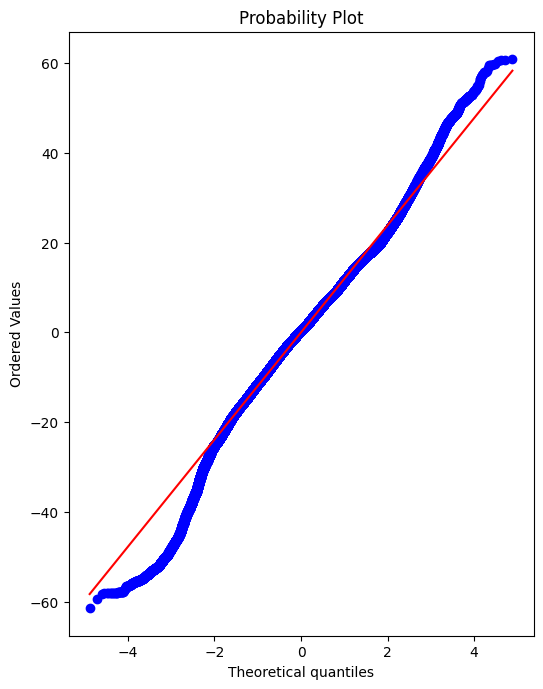

In [32]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax)

Como podemos ver no gráfico de histograma dos resíduos, bem como na distibuição normal de probabilidade, os resíduos são baixos e distribuídos  ao redor do centro, mas se desviam da distribuição normal para os extremos, o que pode ser o fator que influencia o teste de JB e falhar no teste de normalidade.
